#during the project there are cells always made the session restart because of RAM exceed so i have tried to write the code of these sells right so if run it , it will work ISA

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import keras
from keras.models import Sequential 
from keras.layers import Dense , Conv2D , AveragePooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam , RMSprop


# loading the data

In [2]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [3]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#visualizing some data

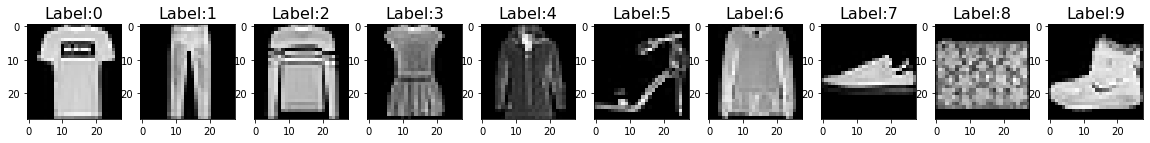

In [4]:
import matplotlib.pyplot as plt
n=10
f,ax=plt.subplots(1,n,figsize=(20,20))
for i in range(0,n):
  sample=x_train[y_train==i][0]
  ax[i].imshow(sample,cmap='gray')
  ax[i].set_title("Label:{}".format(i),fontsize=16)

#Normalizing the data

In [4]:
shape = x_train.shape

# Normalize and reshape the input images
x_train_l = np.expand_dims(x_train.astype('float32'), -1)
x_test_l = np.expand_dims(x_test.astype('float32'), -1)

x_train_l /= 255
x_test_l /= 255

y_train_class = keras.utils.to_categorical(y_train, 10)
y_test_class = keras.utils.to_categorical(y_test, 10)

print('Original training data shape: {}'.format(x_train_l.shape))
print('Training label shape: {}'.format(y_train.shape))

Original training data shape: (60000, 28, 28, 1)
Training label shape: (60000,)


In [6]:
x_train.shape

(60000, 28, 28)

#Implementing LeNet-5 
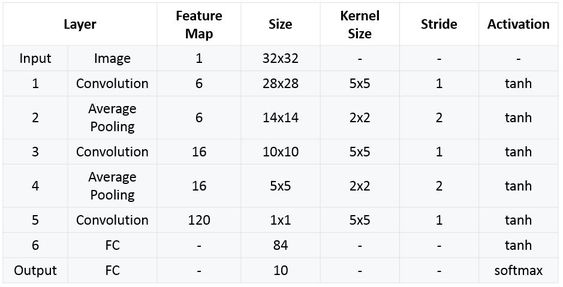
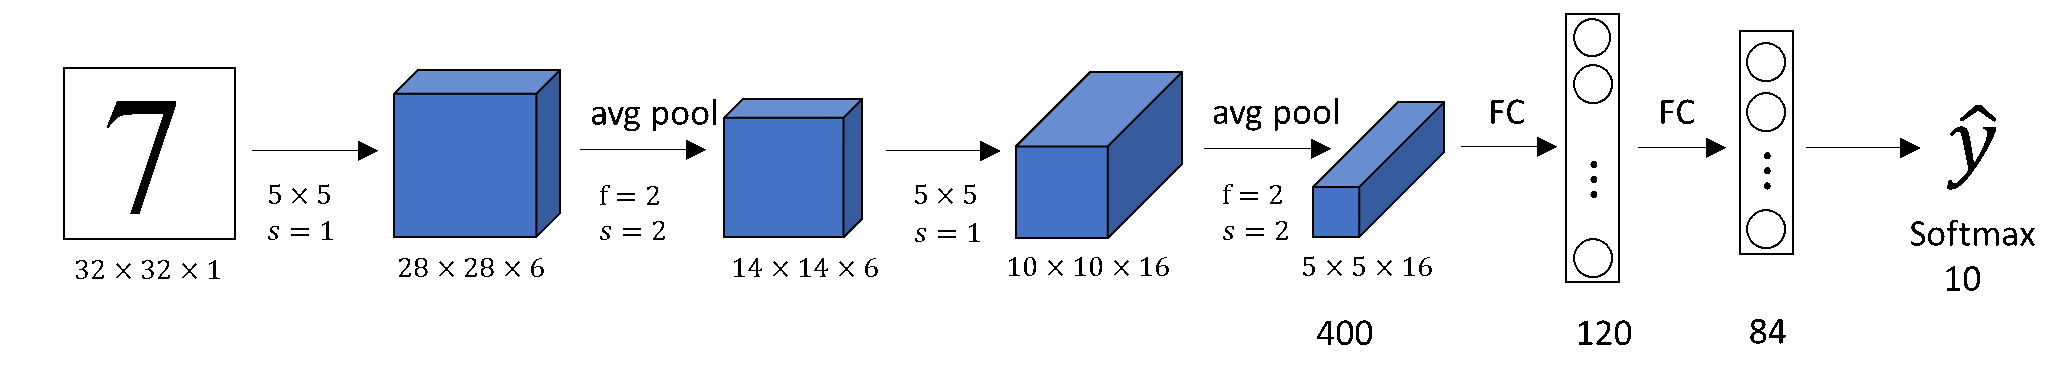

In [96]:
from keras.layers.serialization import activation
def lenet5(input_shape):
  model=Sequential()
  #model.add(keras.layers.Flatten())
  model.add(Conv2D(6, kernel_size=(5,5), strides=(1,1),padding='same',input_shape=input_shape, activation='tanh'))
  model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(16,kernel_size=(5,5), strides=(1,1), activation='tanh',padding='valid'))
  model.add(AveragePooling2D(pool_size=(2,2) , strides=(2,2)))
  model.add(Conv2D(120, kernel_size=(5,5), strides=(1,1), activation='tanh',padding='valid'))
  model.add(keras.layers.Flatten())
  model.add(Dense(84, activation='tanh'))
  model.add(Dense(10, activation='softmax'))
  return model


In [97]:
model=lenet5(x_train_l.shape[1:])

In [98]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_2 (Flatten)         (None, 120)             

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


235/235 [==============================] - 9s 6ms/step - loss: 0.7093 - accuracy: 0.7452
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.4655 - accuracy: 0.8310
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.4078 - accuracy: 0.8540
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3744 - accuracy: 0.8657
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3500 - accuracy: 0.8732
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3329 - accuracy: 0.8784
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3213 - accuracy: 0.8836
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3088 - accuracy: 0.8877
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2952 - accuracy: 0.8923
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3467 - accuracy: 0.8734
on test da

<ipython-input-101-1987787e1306>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


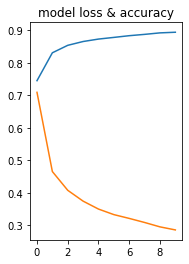

__________________________________________________________
Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.5668 - accuracy: 0.7930
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3920 - accuracy: 0.8585
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3493 - accuracy: 0.8719
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3225 - accuracy: 0.8805
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3014 - accuracy: 0.8895
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2865 - accuracy: 0.8944
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2705 - accuracy: 0.8981
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2568 - accuracy: 0.9046
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2437 - accuracy: 0.9102
Epoch 10/10
313/313 [====================

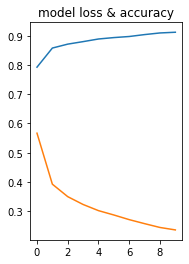

__________________________________________________________
Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 1.3975 - accuracy: 0.5784
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.7596 - accuracy: 0.7301
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6377 - accuracy: 0.7688
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.5836 - accuracy: 0.7879
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.5520 - accuracy: 0.7997
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.5288 - accuracy: 0.8093
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.5093 - accuracy: 0.8163
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.4932 - accuracy: 0.8231
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.4789 - accuracy: 0.8278
Epoch 10/10
313/313 [====================

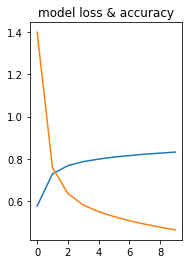

__________________________________________________________


"for i in range(len(learning_rate)):\n    plt.plot(losses, label=str(learning_rate[i]))\n    plt.xlabel('epochs')\n    plt.ylabel('loss')\n    plt.legend()"

In [101]:
learning_rate = [0.001,0.003,0.0001]
losses=[]
for i in learning_rate:
  opt1=Adam(lr=i)
  model=lenet5(x_train_l.shape[1:])
  model.compile(optimizer=opt1, loss='categorical_crossentropy',metrics=['accuracy'])
  history = model.fit(x_train_l, y_train_class, epochs=10,batch_size=256)
  acc = history.history['accuracy']
  loss= history.history['loss']
  print("on test data" ,model.evaluate(x_test_l,y_test_class))
  plt.subplot(1, 2, 1)
  plt.plot(acc)
  plt.subplot(1, 2, 1)
  plt.plot(loss)
  plt.title('model loss & accuracy')
  plt.show()
  #model.evaluate(x_test,y_test_class)
  print('__________________________________________________________')

#using learning rate 0.003 and diffrent epochs

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.5757 - accuracy: 0.7882
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3933 - accuracy: 0.8564
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3489 - accuracy: 0.8715
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3190 - accuracy: 0.8832
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2989 - accuracy: 0.8902
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2827 - accuracy: 0.8947
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2695 - accuracy: 0.8997
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2497 - accuracy: 0.9074
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2409 - accuracy: 0.9093
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3172 - accuracy: 0.8871

<ipython-input-102-7f1ce51eab0a>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


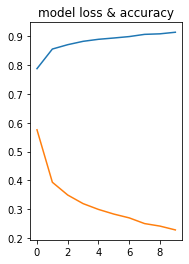

__________________________________________________________
Epoch 1/20
235/235 [==============================] - 2s 6ms/step - loss: 0.6164 - accuracy: 0.7701
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.4125 - accuracy: 0.8472
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3567 - accuracy: 0.8677
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3266 - accuracy: 0.8796
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3051 - accuracy: 0.8871
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.2895 - accuracy: 0.8919
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.2718 - accuracy: 0.8986
Epoch 8/20
235/235 [==============================] - 1s 5ms/step - loss: 0.2587 - accuracy: 0.9026
Epoch 9/20
235/235 [==============================] - 1s 5ms/step - loss: 0.2483 - accuracy: 0.9077
Epoch 10/20
235/235 [====================

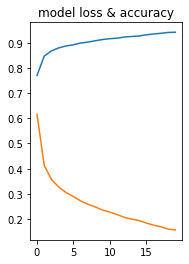

__________________________________________________________
Epoch 1/30
235/235 [==============================] - 2s 5ms/step - loss: 0.5631 - accuracy: 0.7943
Epoch 2/30
235/235 [==============================] - 1s 5ms/step - loss: 0.3826 - accuracy: 0.8604
Epoch 3/30
235/235 [==============================] - 1s 5ms/step - loss: 0.3404 - accuracy: 0.8760
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.3158 - accuracy: 0.8837
Epoch 5/30
235/235 [==============================] - 1s 5ms/step - loss: 0.2946 - accuracy: 0.8900
Epoch 6/30
235/235 [==============================] - 1s 5ms/step - loss: 0.2781 - accuracy: 0.8964
Epoch 7/30
235/235 [==============================] - 1s 5ms/step - loss: 0.2634 - accuracy: 0.9034
Epoch 8/30
235/235 [==============================] - 1s 5ms/step - loss: 0.2518 - accuracy: 0.9075
Epoch 9/30
235/235 [==============================] - 1s 5ms/step - loss: 0.2376 - accuracy: 0.9121
Epoch 10/30
235/235 [====================

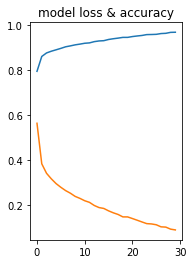

__________________________________________________________


In [102]:
epoch=[10,20,30]
for i in epoch:
  model=lenet5(x_train_l.shape[1:])
  model.compile(optimizer=Adam(lr=0.003), loss='categorical_crossentropy',metrics=['accuracy'])
  history = model.fit(x_train_l, y_train_class, epochs=i,batch_size=256)
  acc = history.history['accuracy']
  loss= history.history['loss']
  print("on test data: " ,model.evaluate(x_test_l,y_test_class))
  plt.subplot(1, 2, 1)
  plt.plot(acc)
  plt.subplot(1, 2, 1)
  plt.plot(loss)
  plt.title('model loss & accuracy')
  plt.show()
  print('__________________________________________________________')


In [14]:
!pip install talos==0.4.9

#Let's automate hyperparameter tunning 

In [15]:
import talos as ta
def model_scan(x_train, y_train_class, x_test, y_test_class, params):
  model = lenet5(x_train.shape[1:])


  model.compile(optimizer=params['optimizer'](lr = params['lr']),
                loss=params['losses'],
                metrics=['categorical_accuracy'])
  
  out = model.fit(x_train, y_train,
                  batch_size=params['batch_size'],
                  epochs=params['epochs'],
                  verbose=0,
                  validation_data=[x_test, y_test_class])
  
  return out, model

In [ ]:
import tensorflow as tf
p = {}
p['lr'] = [0.0001, 0.001, 0.003]
p['batch_size'] =  [128,256,512]
p['epochs'] =  [10,20,30]
p['losses'] =  ['categorical_crossentropy']
p['optimizer'] =  [Adam, keras.optimizers.SGD,RMSprop]
h = ta.Scan(x_train, y_train_class,
          params=p,
          model=model_scan,
          grid_downsample=0.05,
          print_params=True,
          disable_progress_bar=True)

#using VGG16 
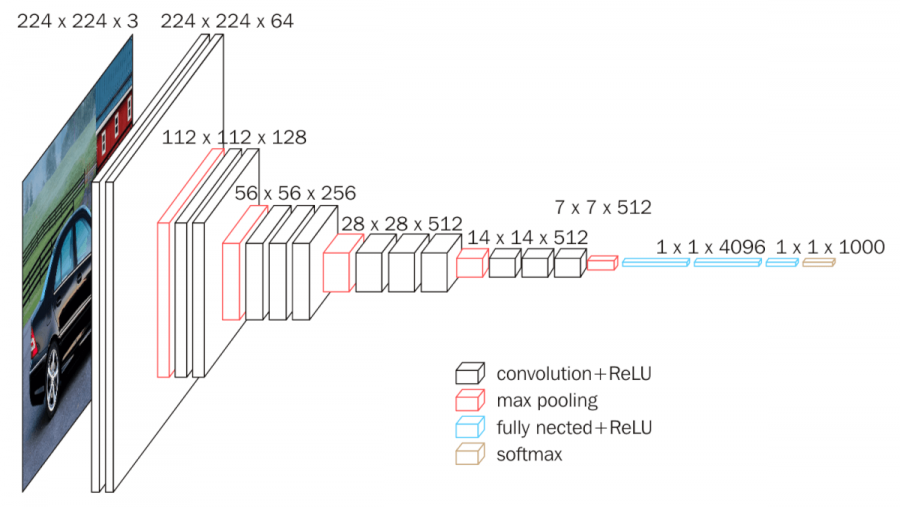

In [6]:
x_train_vgg=np.dstack([x_train] * 3)
x_test_vgg=np.dstack([x_test] * 3)
x_train_vgg.reshape(-1,28,28,3)
x_test_vgg.reshape(-1,28,28,3)
x_train_vgg.shape , x_test_vgg.shape

((5000, 28, 84), (5000, 28, 84))

In [7]:
x_train_vgg=x_train_vgg.reshape(-1,28,28,3)
x_test_vgg=x_test_vgg.reshape(-1,28,28,3)
x_train_vgg.shape , x_test_vgg.shape

((5000, 28, 28, 3), (5000, 28, 28, 3))

#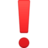In the next cell i tryed to resize the images to be suitable for the VGG16 model but every time i run it it alwayes crashes and the session restart 

In [ ]:
from tensorflow.keras.utils import img_to_array, array_to_img
x_train_vgg= np.asarray([img_to_array(array_to_img(im, scale=False).resize((224,224))) for im in x_train_vgg])
x_test_vgg = np.asarray([img_to_array(array_to_img(im, scale=False).resize((224,224))) for im in x_test_vgg])
x_train_vgg.shape , x_test_vgg.shape

In [9]:
x_train_vgg = x_train_vgg / 255.
x_test_vgg = x_test_vgg / 255.
x_train_vgg = x_train_vgg.astype('float32')
x_test_vgg = x_test_vgg.astype('float32')
from keras.applications.vgg16 import preprocess_input
# Preprocessing the input 
x_train_vgg = preprocess_input(x_train_vgg)
x_test_vgg  = preprocess_input (x_test_vgg)

In [10]:
vgg16_model=keras.applications.vgg16.VGG16(weights="imagenet", input_shape=(224, 224, 3), include_top=False)

In [11]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
from keras.layers import Lambda, Input
model1=Sequential()
for layer in vgg16_model.layers[:-1]:
  model1.add(layer)



In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
for layer in model1.layers:
  layer.trainable=False
model1.add(Dense(units=256, activation='relu'))
model1.add(Dense(units=256, activation='relu'))
model1.add(Dense(units=10, activation='softmax'))


In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model1.fit(x_train_vgg,y_train_class,epochs=10,verbose=1)


#GoogLeNet / Inception V3
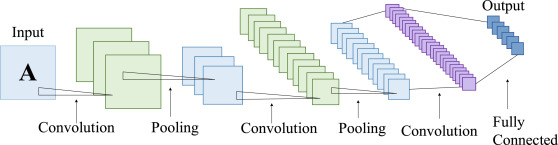


In [ ]:
x_train_inc=np.dstack([x_train] * 3)
x_test_inc=np.dstack([x_test]*3)
x_train_inc.shape,x_test_inc.shape
x_train_inc = x_train_inc.reshape(-1, 28,28,3)
x_test_inc= x_test_inc.reshape (-1,28,28,3)
x_train_inc.shape,x_test_inc.shape

In [ ]:
from tensorflow.keras.utils import img_to_array, array_to_img
x_train_inc = np.asarray([img_to_array(array_to_img(im, scale=False).resize((299, 299))) for im in x_train_inc])
x_test_inc= np.asarray([img_to_array(array_to_img(im, scale=False).resize((299, 299))) for im in x_test_inc])
x_train_inc.shape, x_test_inc.shape

In [8]:
# Normalise the data and change data type
x_train_inc = x_train_inc / 255.
x_test_inc = x_test_inc / 255.
train_X = x_train_inc.astype('float32')
test_X = x_test_inc.astype('float32')

In [9]:
Inc_model=tf.keras.applications.InceptionV3(include_top=False, input_shape=(299,299,3), weights='imagenet')

87910968/87910968 [==============================] - 0s 0us/step


In [10]:
Inc_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [16]:
for layer in Inc_model.layers[:]:
  layer.trainable = False
Inc_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
from keras.layers import GlobalAveragePooling2D , Flatten , Dense
from keras.models import Model
output = Inc_model.output
output = GlobalAveragePooling2D()(output)
output = Flatten()(output)
output = Dense(units=256, activation='relu')(output)
output = Dense(units=256, activation='relu')(output)
output = Dense(units=10, activation='softmax')(output)
Inc_model = Model(Inc_model.input, output)


In [ ]:
Inc_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = Inc_model.fit(x_train_inc, y_train_class, epochs = 10, batch_size = 256)